In [1]:
import pandas as pd
import numpy as np
import json
import requests as req
from citipy import citipy
import matplotlib.pyplot as plt

from API_Key import API_Key

In [2]:
num_of_cities = 4500
latitude = np.random.uniform(-90,90, size = num_of_cities)
longitude = np.random.uniform(-180,180,size = num_of_cities)
coord = pd.DataFrame(latitude, longitude)
coord = coord.reset_index()
coord = coord.rename(columns = {'index':'latitude',0:'longitude'})
#coor

In [3]:
cities = []
country = []
for index, row in coord.iterrows():
    lat = row['latitude']
    lng = row['longitude']
    city = citipy.nearest_city(lat,lng)
    cities.append(city.city_name)
    country.append(city.country_code)

In [4]:
cities_df = pd.DataFrame(cities)
cities_df['country_code'] = pd.DataFrame(country)
cities_df = cities_df.rename(columns = {0 : 'city_name'})
cities_df['latitude'] = coord['latitude']
cities_df['longitude'] = coord['longitude']
cities_df['temperature'] = ''
cities_df['humidity'] = ''
cities_df['cloudiness'] =''
cities_df['wind_speed'] = ''

In [5]:
units = 'imperial'

for index, row in cities_df.iterrows():
    url = 'http://api.openweathermap.org/data/2.5/weather?'

    city = row[0]
    query_url = f'{url}appid={API_Key}&q={city}&units={units}'
    city_weather = req.get(query_url)
    weather_json = city_weather.json()
    #print(weather_json)
    try:
        temp = weather_json['main']['temp']
        humid = weather_json['main']['humidity']
        cloud = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        cities_df.set_value(index,'temperature', temp)
        cities_df.set_value(index, 'humidity', humid)
        cities_df.set_value(index, 'cloudiness', cloud)
        cities_df.set_value(index, 'wind_speed', wind)
        #print(temperature)
    except:
        continue

#append cities_df with temp and other data

In [6]:
cities_df

,city_name,country_code,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,illoqqortoormiut,gl,82.618632,-32.820346,,,,
1,clyde river,ca,68.102439,-71.556313,8.6,84,90,17.22
2,illoqqortoormiut,gl,116.164130,-23.707253,,,,
3,barentsburg,sj,161.513000,-14.577677,,,,
4,illoqqortoormiut,gl,148.879519,-26.660290,,,,
5,baiao,br,-2.495296,-50.112236,77.1,95,36,2.37
6,belushya guba,ru,141.206772,58.743389,,,,
7,luderitz,na,-32.793969,5.914968,62.6,88,36,3.36
8,illoqqortoormiut,gl,108.454437,-34.536518,,,,
9,ushuaia,ar,-172.889007,-3.570603,50,76,40,12.1


In [7]:
cities_df.replace('', np.nan, inplace= True)
cities_df = cities_df.drop_duplicates(subset=['city_name','country_code'], keep='first')
cities_df = cities_df.dropna()
cities_df

,city_name,country_code,latitude,longitude,temperature,humidity,cloudiness,wind_speed
1,clyde river,ca,68.102439,-71.556313,8.60,84.0,90.0,17.22
5,baiao,br,-2.495296,-50.112236,77.10,95.0,36.0,2.37
7,luderitz,na,-32.793969,5.914968,62.60,88.0,36.0,3.36
9,ushuaia,ar,-172.889007,-3.570603,50.00,76.0,40.0,12.10
10,tasiilaq,gl,74.221974,-36.885100,23.00,67.0,92.0,17.22
12,kadoma,zw,-17.980137,29.317712,60.81,67.0,0.0,11.65
13,manica,mz,-19.084994,32.921523,68.00,100.0,75.0,6.93
14,busselton,au,-101.788054,75.911999,60.27,100.0,0.0,17.81
15,elat,il,29.899250,34.845456,69.59,97.0,76.0,2.15
18,bolshaya martynovka,ru,47.199985,41.665799,43.17,82.0,32.0,13.89


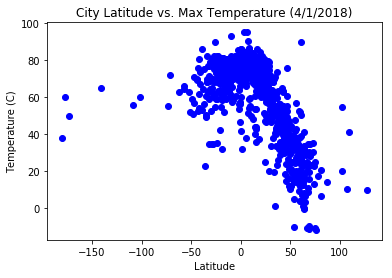

In [8]:
x_axis = cities_df['latitude']
y_temp_axis = cities_df['temperature']

plt.plot(x_axis,y_temp_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. Max Temperature (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

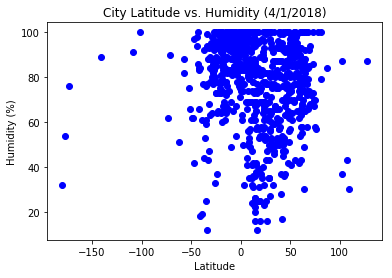

In [9]:
y_humid_axis = cities_df['humidity']

plt.plot(x_axis,y_humid_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. Humidity (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

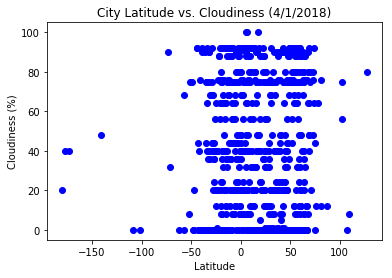

In [10]:
y_cloud_axis = cities_df['cloudiness']

plt.plot(x_axis,y_cloud_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. Cloudiness (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

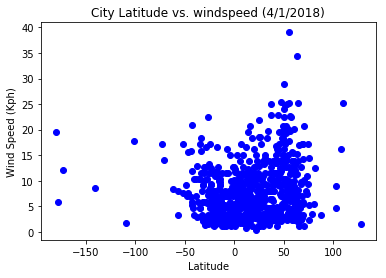

In [11]:
y_wind_axis = cities_df['wind_speed']

plt.plot(x_axis,y_wind_axis, marker='o', color='blue', linewidth = 0)
plt.title('City Latitude vs. windspeed (4/1/2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (Kph)')
plt.show()

In [12]:
cities_df.to_csv('CitiesWeatherData.csv')